 Network Intrusion Detection System
==============================

By Paras Ahuja
----------------------

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))


pandas : 0.23.4
numpy : 1.15.4
matplotlib : 2.2.3
seaborn : 0.9.0
sklearn : 0.19.2
imblearn : 0.3.1


In [2]:
#definfing field name in the dataset
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
kdd_train = pd.read_table("/home/paras/Documents/major project/NIDS_KDD_dataset/Train.txt", sep=",", names=datacols) 
kdd_train = kdd_train.iloc[:,:-1]
kdd_test = pd.read_table("/home/paras/Documents/major project/NIDS_KDD_dataset/Test.txt", sep=",", names=datacols)
kdd_test = kdd_test.iloc[:,:-1]

In [3]:
#data set display
kdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
print('Train set dimension: {} rows, {} columns'.format(kdd_train.shape[0], kdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


In [5]:
kdd_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [6]:
print('Test set dimension: {} rows, {} columns'.format(kdd_test.shape[0], kdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


In [7]:
#mapping dataset 
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [8]:
#attack class mapping to dataset
kdd_train['attack_class'] = kdd_train['attack'].apply(lambda v: mapping[v])
kdd_test['attack_class'] = kdd_test['attack'].apply(lambda v: mapping[v])

In [9]:
#dropping attack column from both the dataset
kdd_train.drop(['attack'], axis=1, inplace=True)
kdd_test.drop(['attack'], axis=1, inplace=True)

In [10]:
print('Dimensions of train dataset:' ,kdd_train.shape)
print('Dimensions of test dataset:' ,kdd_test.shape)

Dimensions of train dataset: (125973, 42)
Dimensions of test dataset: (22544, 42)


In [11]:
#vewing altered dataset
kdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [12]:
kdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
kdd_train['num_outbound_cmds'].value_counts()


0    125973
Name: num_outbound_cmds, dtype: int64

In [14]:
kdd_test['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [15]:
#to improve data set efficiancy we need to remove redundant data from the dataset,i.e., 'num_outbound_cmds' which gives all the values as zero
kdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
kdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [16]:
# Attack Class Distribution
attack_class_freq_train = kdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = kdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
DoS,45927,36.46,7458,33.08
Normal,67343,53.46,9711,43.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


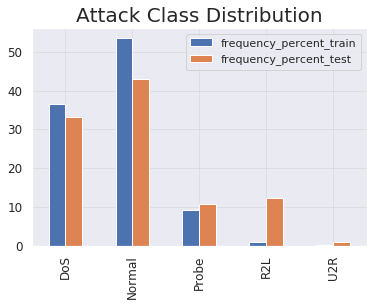

In [17]:
#attack class plot bar graph
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [18]:
kdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [19]:
#Scaling Numerical Attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extracting numerical attributes and scale it to have zero mean and unit variance  
cols = kdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(kdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(kdd_test.select_dtypes(include=['float64','int64']))

# adding data back to dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# obtaining categorial attributes from both training and testing dataset
cattrain = kdd_train.select_dtypes(include=['object']).copy()
cattest = kdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [21]:
#DATA SAMPLING
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = kdd_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


In [22]:
kdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


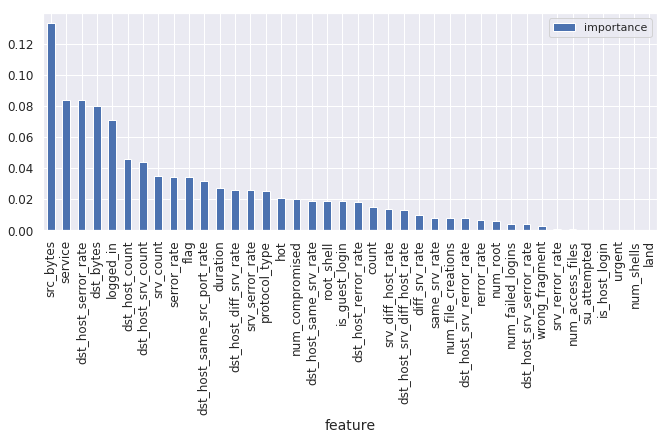

In [23]:
# Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();
rfc.fit(X_res, y_res);
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()


In [24]:
#Feature Selection
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [25]:
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service']

In [26]:
feature_map

[(False, 'duration'),
 (True, 'src_bytes'),
 (True, 'dst_bytes'),
 (False, 'land'),
 (False, 'wrong_fragment'),
 (False, 'urgent'),
 (False, 'hot'),
 (False, 'num_failed_logins'),
 (True, 'logged_in'),
 (False, 'num_compromised'),
 (False, 'root_shell'),
 (False, 'su_attempted'),
 (False, 'num_root'),
 (False, 'num_file_creations'),
 (False, 'num_shells'),
 (False, 'num_access_files'),
 (False, 'is_host_login'),
 (False, 'is_guest_login'),
 (True, 'count'),
 (False, 'srv_count'),
 (False, 'serror_rate'),
 (False, 'srv_serror_rate'),
 (False, 'rerror_rate'),
 (False, 'srv_rerror_rate'),
 (False, 'same_srv_rate'),
 (False, 'diff_srv_rate'),
 (False, 'srv_diff_host_rate'),
 (False, 'dst_host_count'),
 (True, 'dst_host_srv_count'),
 (False, 'dst_host_same_srv_rate'),
 (True, 'dst_host_diff_srv_rate'),
 (True, 'dst_host_same_src_port_rate'),
 (False, 'dst_host_srv_diff_host_rate'),
 (True, 'dst_host_serror_rate'),
 (True, 'dst_host_srv_serror_rate'),
 (False, 'dst_host_rerror_rate'),
 (Fals

In [27]:
sc_traindf
print(rfc.fit(X_res, y_res))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [28]:


print(importances)
print(refclasscol)
print(rfc.feature_importances_)
enctrain

                             importance
feature                                
src_bytes                         0.133
service                           0.084
dst_host_serror_rate              0.084
dst_bytes                         0.080
logged_in                         0.071
dst_host_count                    0.046
dst_host_srv_count                0.044
srv_count                         0.035
serror_rate                       0.034
flag                              0.034
dst_host_same_src_port_rate       0.032
duration                          0.027
dst_host_diff_srv_rate            0.026
srv_serror_rate                   0.026
protocol_type                     0.025
hot                               0.021
num_compromised                   0.020
dst_host_same_srv_rate            0.019
root_shell                        0.019
is_guest_login                    0.019
dst_host_rerror_rate              0.018
count                             0.015
srv_diff_host_rate                0.014


,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9
5,1,49,1
6,1,49,5
7,1,49,5
8,1,51,5
9,1,49,5


In [29]:
df1 = pd.DataFrame(traincat)
df1.head(5)
#importances

,protocol_type,service,flag,attack_class
0,1,20,9,1
1,2,44,9,1
2,1,49,5,0
3,1,24,9,1
4,1,24,9,1


In [30]:
kdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [31]:
#Dataset Partition
newcol = list(refclasscol)
newcol.append('attack_class')
new_y_res = y_res[:, np.newaxis]
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 
# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

print(res_df.shape)
reftest.shape

(336715, 41)


(22544, 41)

In [32]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [33]:
for k, v in classdict.items():
    print(k)


Normal_DoS
Normal_Probe
Normal_R2L
Normal_U2R


In [34]:

pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'



In [35]:
classdict['Normal_DoS'][1]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.352750,-0.602719,-0.565483,1.0,19.0,9.0,1.0
5,-0.155534,-0.021423,0.587166,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.583713,-0.304561,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.413357,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.321505,-0.352750,-0.602719,-0.565483,1.0,22.0,9.0,1.0
6,-0.155534,-0.019826,-0.078657,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.315789,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-1.008669,-1.144701,2.851953,-0.431856,-0.229980,-0.358118,-0.352750,1.256688,-0.465699,1.0,49.0,9.0,1.0
8,-0.155534,-0.021296,-0.074887,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.358096,0.178256,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.229196,-0.455895,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.358118,-0.352750,-0.602719,-0.565483,1.0,22.0,9.0,1.0
11,-0.155534,-0.020685,-0.081344,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.327018,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-0.105121,-0.226593,-0.274293,-0.431856,-0.229980,-0.358118,-0.352750,0.249509,-0.565483,1.0,49.0,9.0,1.0
12,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.248736,-0.327018,-0.348468,-0.347390,1.830141,1.837604,-1.746346,-0.092902,-0.386963,0.650093,-1.241266,-1.374228,-0.093062,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
13,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.318755,0.997923,3.037227,3.004659,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,0.437403,0.270612,0.278367,-0.093062,-0.431856,-0.229980,2.168127,3.0177

In [36]:
#finalising data preprocesing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [40]:
X_test.shape[1]

74

In [41]:
# Train Model
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train RandomForestClassifier Model
RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train);

In [42]:
# Evaluate Models
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS SVM Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9858560124038966

Model Accuracy:
 0.9859302377381465

Confusion matrix:
 [[65900  1443]
 [  452 66891]]

Classification report:
              precision    recall  f1-score   support

        0.0       0.99      0.98      0.99     67343
        1.0       0.98      0.99      0.99     67343

avg / total       0.99      0.99      0.99    134686



============================== Normal_DoS Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9761668231044623

Model Accuracy:
 0.976003445049968

Confusion matrix:
 [[65087  2256]
 [  976 66367]]

Classification report:
              precision    recall  f1-score   support

        0.0       0.99      0.97      0.98     67343
        1.0       0.97      0.99      0.98     67343

avg / total       0.98      0.98      0.98    134686



=======================

In [ ]:
import pickle
with open('Normal_DoS','wb') as f:
    pickle.dump(models,f)
    

In [44]:
#Test models
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS SVM Classifier Model Test Results ==============================

Model Accuracy:
 0.8397693517385987

Confusion matrix:
 [[5678 1780]
 [ 971 8740]]

Classification report:
              precision    recall  f1-score   support

        0.0       0.85      0.76      0.80      7458
        1.0       0.83      0.90      0.86      9711

avg / total       0.84      0.84      0.84     17169



============================== Normal_DoS Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8337119226512901

Confusion matrix:
 [[5447 2011]
 [ 844 8867]]

Classification report:
              precision    recall  f1-score   support

        0.0       0.87      0.73      0.79      7458
        1.0       0.82      0.91      0.86      9711

avg / total       0.84      0.83      0.83     17169



============================== Normal_DoS Decision Tree Classifier Model Test Results ==============================

Model Ac

In [45]:
models

[('SVM Classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True,
    tol=0.001, verbose=False)),
 ('Naive Baye Classifier',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('Decision Tree Classifier',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest Classifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
      

In [46]:
models[1]

('Naive Baye Classifier',
 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))

In [47]:
Xtestcat

,service
0,45.0
1,45.0
2,19.0
5,22.0
6,49.0
8,22.0
11,49.0
12,45.0
13,55.0
14,55.0


In [48]:
reftest 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.352750,-0.602719,-0.565483,1.0,19.0,9.0,1.0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.352750,-0.602719,-0.565483,0.0,13.0,9.0,2.0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.352750,1.540764,1.205682,1.0,55.0,2.0,2.0
5,-0.155534,-0.021423,0.587166,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.583713,-0.304561,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.413357,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.321505,-0.352750,-0.602719,-0.565483,1.0,22.0,9.0,1.0
6,-0.155534,-0.019826,-0.078657,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.315789,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-1.008669,-1.144701,2.851953,-0.431856,-0.229980,-0.358118,-0.352750,1.256688,-0.465699,1.0,49.0,9.0,1.0
7,-0.155534,-0.021715,-0.088696,-0.017624,-0.059104,-0.019459,-0.113521,6.508280,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.321505,-0.317271,-0.551069,-0.515591,1.0,55.0,9.0,3.0
8,-0.155534,-0.021296,-0.074887,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.358096,0.178256,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.229196,-0.455895,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.358118,-0.352750

In [49]:
newcol

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'service',
 'flag',
 'attack_class']

Normal_probe
--------------------

In [50]:
pretrain = classdict['Normal_Probe'][0]
pretest = classdict['Normal_Probe'][1]
grpclass = 'Normal_Probe'

In [51]:
#finalising data preprocesing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [52]:
# Train Model
#from sklearn.svm import SVC 
#from sklearn.naive_bayes import BernoulliNB 
#from sklearn import tree
#from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
#KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
#LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
#BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
#DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
#SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train);

In [ ]:
# Evaluate Models
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_Probe SVM Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9720015559993287

Model Accuracy:
 0.9723505041355449

Confusion matrix:
 [[64341  3002]
 [  722 66621]]

Classification report:
              precision    recall  f1-score   support

        1.0       0.99      0.96      0.97     67343
        2.0       0.96      0.99      0.97     67343

avg / total       0.97      0.97      0.97    134686



============================== Normal_Probe Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9525860700025509

Model Accuracy:
 0.9521405342797321

Confusion matrix:
 [[61564  5779]
 [  667 66676]]

Classification report:
              precision    recall  f1-score   support

        1.0       0.99      0.91      0.95     67343
        2.0       0.92      0.99      0.95     67343

avg / total       0.95      0.95      0.95    134686



==================

In [ ]:
import pickle
with open('Normal_Probe','wb') as f:
    pickle.dump(models,f)
    

In [ ]:
#Test models
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

R2L
----

In [ ]:
pretrain = classdict['Normal_R2L'][0]
pretest = classdict['Normal_R2L'][1]
grpclass = 'Normal_R2L'

In [ ]:
#finalising data preprocesing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [ ]:
# Train Model
#from sklearn.svm import SVC 
##from sklearn.naive_bayes import BernoulliNB 
#from sklearn import tree
#from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
#KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
#LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
#BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
#DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
#SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train);

In [ ]:
# Evaluate Models
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

In [ ]:
import pickle
with open('Normalr2l','wb') as f:
    pickle.dump(models,f)
    

In [ ]:
#Test models
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

In [ ]:
pretrain = classdict['Normal_U2R'][0]
pretest = classdict['Normal_U2R'][1]
grpclass = 'Normal_U2R'

In [ ]:
#finalising data preprocesing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [ ]:
# Train Model
#from sklearn.svm import SVC 
##from sklearn.naive_bayes import BernoulliNB 
#from sklearn import tree
#from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
#KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
#LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
#BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
#DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
#SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train);

In [ ]:
# Evaluate Models
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

In [ ]:
import pickle
with open('Normalu2r','wb') as f:
    pickle.dump(models,f)
    

In [ ]:
#Test models
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

In [ ]:
print(Xresdfnum)
    

In [ ]:
print(Xresdfcat)

In [ ]:
print(enc.fit(Xresdfcat))

In [ ]:
print(Xtest_features)

In [ ]:
print(newtest)

In [ ]:
print(Xresdfnew)

In [ ]:
print(Xresdf)

In [ ]:
selected_features

In [ ]:
print(Y_test)

In [ ]:
print(classdict['Normal_U2R'][0])

In [ ]:
print(X_train[0])
print(X_train[1])
print(Y_test[19])

In [ ]:
reftest.head(5)

In [ ]:
res_df.head(5)

In [ ]:
refclasscol

In [ ]:
reftest.head(5)

In [ ]:
pretrain.head(5)

In [151]:
classdict['Normal_R2L'][1].head(8)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.34739,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.34739,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1.0,19.0,9.0,1.0
5,-0.155534,-0.021423,0.587166,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.583713,-0.304561,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.413357,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.321505,-0.35275,-0.602719,-0.565483,1.0,22.0,9.0,1.0
6,-0.155534,-0.019826,-0.078657,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.315789,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-1.008669,-1.144701,2.851953,-0.431856,-0.229980,-0.358118,-0.35275,1.256688,-0.465699,1.0,49.0,9.0,1.0
8,-0.155534,-0.021296,-0.074887,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.358096,0.178256,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.229196,-0.455895,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.358118,-0.35275,-0.602719,-0.565483,1.0,22.0,9.0,1.0
11,-0.155534,-0.020685,-0.081344,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.327018,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-0.105121,-0.226593,-0.274293,-0.431856,-0.229980,-0.358118,-0.35275,0.249509,-0.565483,1.0,49.0,9.0,1.0
12,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.248736,-0.327018,-0.348468,-0.34739,1.830141,1.837604,-1.746346,-0.092902,-0.386963,0.650093,-1.241266,-1.374228,-0.093062,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0


In [148]:
kdd_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,Probe
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,Normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,Normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,Normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L


In [154]:
cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [160]:
cattest.head(10)

,protocol_type,service,flag,attack_class
0,tcp,private,REJ,DoS
1,tcp,private,REJ,DoS
2,tcp,ftp_data,SF,Normal
3,icmp,eco_i,SF,Probe
4,tcp,telnet,RSTO,Probe
5,tcp,http,SF,Normal
6,tcp,smtp,SF,Normal
7,tcp,telnet,SF,R2L
8,tcp,http,SF,Normal
9,tcp,ftp,SF,R2L


In [159]:
testcat.head(10)

,protocol_type,service,flag,attack_class
0,1,45,1,0
1,1,45,1,0
2,1,19,9,1
3,0,13,9,2
4,1,55,2,2
5,1,22,9,1
6,1,49,9,1
7,1,55,9,3
8,1,22,9,1
9,1,18,9,3


In [163]:
rfe.get_support()

array([False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True, False])

In [164]:
feature_map

[(False, 'duration'),
 (True, 'src_bytes'),
 (True, 'dst_bytes'),
 (False, 'land'),
 (False, 'wrong_fragment'),
 (False, 'urgent'),
 (False, 'hot'),
 (False, 'num_failed_logins'),
 (True, 'logged_in'),
 (False, 'num_compromised'),
 (False, 'root_shell'),
 (False, 'su_attempted'),
 (False, 'num_root'),
 (False, 'num_file_creations'),
 (False, 'num_shells'),
 (False, 'num_access_files'),
 (False, 'is_host_login'),
 (False, 'is_guest_login'),
 (True, 'count'),
 (True, 'srv_count'),
 (False, 'serror_rate'),
 (False, 'srv_serror_rate'),
 (False, 'rerror_rate'),
 (False, 'srv_rerror_rate'),
 (False, 'same_srv_rate'),
 (False, 'diff_srv_rate'),
 (False, 'srv_diff_host_rate'),
 (False, 'dst_host_count'),
 (True, 'dst_host_srv_count'),
 (False, 'dst_host_same_srv_rate'),
 (True, 'dst_host_diff_srv_rate'),
 (True, 'dst_host_same_src_port_rate'),
 (False, 'dst_host_srv_diff_host_rate'),
 (True, 'dst_host_serror_rate'),
 (False, 'dst_host_srv_serror_rate'),
 (False, 'dst_host_rerror_rate'),
 (Fals

In [166]:
res_df.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1.0,20.0,9.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2.0,44.0,9.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1.0,24.0,9.0,1.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,24.0,9.0,1.0
5,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.322182,-0.120298,-0.637209,-0.631929,2.746403,2.715365,-1.139453,-0.016930,-0.374560,0.734343,-0.873089,-1.005110,-0.068553,-0.480197,-0.289103,-0.639532,-0.624871,2.874410,2.753914,1.0,49.0,1.0,0.0
6,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.715167,-0.257971,1.602664,1.605104,-0.374362,-0.374432,-1.389669,-0.016930,-0.374560,0.734343,-0.963422,-1.071933,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,0.0
7,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.287250,-0.161600,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.909222,-1.027384,-0.068553,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,0.0
8,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,1.623399,-0.065228,1.602664,1.605104,-0.374362,-0.374432,-1.298681,-0.072389,-0.374560,0.734343,-0.836956,-0.960561,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-

In [168]:
reftest.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,1.0,45.0,1.0,0.0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.352750,-0.602719,-0.565483,1.0,19.0,9.0,1.0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.352750,-0.602719,-0.565483,0.0,13.0,9.0,2.0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.352750,1.540764,1.205682,1.0,55.0,2.0,2.0
5,-0.155534,-0.021423,0.587166,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.583713,-0.304561,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.413357,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.321505,-0.352750,-0.602719,-0.565483,1.0,22.0,9.0,1.0
6,-0.155534,-0.019826,-0.078657,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.315789,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-1.008669,-1.144701,2.851953,-0.431856,-0.229980,-0.358118,-0.352750,1.256688,-0.465699,1.0,49.0,9.0,1.0
7,-0.155534,-0.021715,-0.088696,-0.017624,-0.059104,-0.019459,-0.113521,6.508280,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.321505,-0.317271,-0.551069,-0.515591,1.0,55.0,9.0,3.0
8,-0.155534,-0.021296,-0.074887,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.358096,0.178256,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.229196,-0.455895,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.358118,-0.352750

In [177]:
Xtest_features.head(10)

,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,service
2,0.005473,-0.096896,-0.890373,-0.607053,-0.338246,-0.489800,-0.228985,1.559906,-0.358118,19.0
5,-0.021423,0.587166,1.123125,-0.583713,-0.304561,1.022079,-0.410217,-0.399204,-0.321505,22.0
6,-0.019826,-0.078657,1.123125,-0.607053,-0.315789,-1.008669,2.851953,-0.431856,-0.358118,49.0
8,-0.021296,-0.074887,1.123125,-0.358096,0.178256,1.022079,-0.410217,-0.399204,-0.358118,22.0
11,-0.020685,-0.081344,1.123125,-0.607053,-0.327018,-0.105121,-0.274293,-0.431856,-0.358118,49.0
14,-0.020353,17.067107,1.123125,-0.607053,-0.338246,-0.606098,-0.183678,-0.333901,-0.358118,55.0
15,-0.021248,0.073236,1.123125,-0.552593,-0.259648,1.022079,-0.410217,-0.399204,-0.358118,22.0
16,-0.021538,-0.065839,1.123125,-0.428115,-0.079995,1.022079,-0.410217,-0.431856,-0.358118,22.0
17,-0.021468,0.001601,1.123125,-0.490354,-0.169821,1.022079,-0.410217,-0.333901,-0.358118,22.0
18,-0.021893,-0.094822,-0.890373,3.314016,5.320825,1.022079,-0.410217,2.833328,-0.358118,45.0


In [176]:
Xtestdfnum.head(10)

,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate
2,0.005473,-0.096896,-0.890373,-0.607053,-0.338246,-0.489800,-0.228985,1.559906,-0.358118
5,-0.021423,0.587166,1.123125,-0.583713,-0.304561,1.022079,-0.410217,-0.399204,-0.321505
6,-0.019826,-0.078657,1.123125,-0.607053,-0.315789,-1.008669,2.851953,-0.431856,-0.358118
8,-0.021296,-0.074887,1.123125,-0.358096,0.178256,1.022079,-0.410217,-0.399204,-0.358118
11,-0.020685,-0.081344,1.123125,-0.607053,-0.327018,-0.105121,-0.274293,-0.431856,-0.358118
14,-0.020353,17.067107,1.123125,-0.607053,-0.338246,-0.606098,-0.183678,-0.333901,-0.358118
15,-0.021248,0.073236,1.123125,-0.552593,-0.259648,1.022079,-0.410217,-0.399204,-0.358118
16,-0.021538,-0.065839,1.123125,-0.428115,-0.079995,1.022079,-0.410217,-0.431856,-0.358118
17,-0.021468,0.001601,1.123125,-0.490354,-0.169821,1.022079,-0.410217,-0.333901,-0.358118
18,-0.021893,-0.094822,-0.890373,3.314016,5.320825,1.022079,-0.410217,2.833328,-0.358118


In [178]:
Xtestcat.head(10)

,service
2,19.0
5,22.0
6,49.0
8,22.0
11,49.0
14,55.0
15,22.0
16,22.0
17,22.0
18,45.0


In [180]:
print(enc.fit(Xresdfcat))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)


In [188]:
Xtestdfnum.values

array([[ 5.473e-03, -9.690e-02, -8.904e-01, -6.071e-01, -3.382e-01,
        -4.898e-01, -2.290e-01,  1.560e+00, -3.581e-01],
       [-2.142e-02,  5.872e-01,  1.123e+00, -5.837e-01, -3.046e-01,
         1.022e+00, -4.102e-01, -3.992e-01, -3.215e-01],
       [-1.983e-02, -7.866e-02,  1.123e+00, -6.071e-01, -3.158e-01,
        -1.009e+00,  2.852e+00, -4.319e-01, -3.581e-01],
       [-2.130e-02, -7.489e-02,  1.123e+00, -3.581e-01,  1.783e-01,
         1.022e+00, -4.102e-01, -3.992e-01, -3.581e-01],
       [-2.069e-02, -8.134e-02,  1.123e+00, -6.071e-01, -3.270e-01,
        -1.051e-01, -2.743e-01, -4.319e-01, -3.581e-01],
       [-2.035e-02,  1.707e+01,  1.123e+00, -6.071e-01, -3.382e-01,
        -6.061e-01, -1.837e-01, -3.339e-01, -3.581e-01],
       [-2.125e-02,  7.324e-02,  1.123e+00, -5.526e-01, -2.596e-01,
         1.022e+00, -4.102e-01, -3.992e-01, -3.581e-01],
       [-2.154e-02, -6.584e-02,  1.123e+00, -4.281e-01, -7.999e-02,
         1.022e+00, -4.102e-01, -4.319e-01, -3.581e-01],


In [190]:
X_test_1hotenc

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 